In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

C:\Users\admin\AppData\Local\Temp\ipykernel_7760\1757010296.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
wine = load_wine()

In [3]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

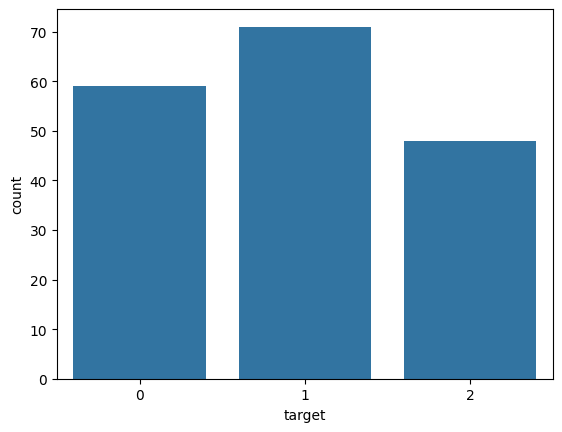

In [5]:
sns.countplot(x='target', data = df)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df[wine.feature_names], df['target'], test_size = 0.2, random_state = 42
)

In [8]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7222222222222222

In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))

Classification Report:
               precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.79      0.79      0.79        14
     class_2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [10]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[12,  0,  2],
       [ 0, 11,  3],
       [ 2,  3,  3]], dtype=int64)